# Chapter 38 - Google BigQuery
## Building Machine Learning and Deep Learning Models on Google Cloud Platform
### Ekaba Bisong

## Creating BQ Dataset and Loading Dataset

In [18]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [19]:
# configure GCP project
project_id = 'ekabasandbox'
!gcloud config set project {project_id}

Updated property [core/project].


In [0]:
# unique bucket name
bucket_name ='ebisong-bq'
bigquery_dataset = 'ebisong_crypto'

In [7]:
# create bucket
!gsutil mb gs://{bucket_name}

Creating gs://ebisong-bq/...


In [8]:
# upload dataset to bucket
!gsutil cp crypto-markets.csv gs://{bucket_name}

Copying file://crypto-markets.csv [Content-Type=text/csv]...
-
Operation completed over 1 objects/47.0 MiB.                                     


In [10]:
# show the transferred data in the bucket
!gsutil ls gs://{bucket_name}

gs://ebisong-bq/crypto-markets.csv


In [16]:
# create a BigQuery dataset
!bq mk {bigquery_dataset}

Dataset 'ekabasandbox:ebisong_crypto' successfully created.


In [13]:
# list BigQuery datasets
!bq ls

     datasetId      
 ------------------ 
  bigquery_dataset  


In [17]:
# load dataset from Cloud Storage to BigQuery
!bq load {bigquery_dataset}.markets_terminal gs://{bucket_name}/crypto-markets.csv slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread

Waiting on bqjob_r6bdd11ffcabe1bf_0000016befc5ba49_1 ... (15s) Current status: DONE   


In [22]:
# examine the newly created table
!bq ls {bigquery_dataset}

      tableId        Type    Labels   Time Partitioning   Clustered Fields  
 ------------------ ------- -------- ------------------- ------------------ 
  markets_terminal   TABLE                                                  


In [23]:
# examine the table schema
!bq show {bigquery_dataset}.markets_terminal

Table ekabasandbox:ebisong_crypto.markets_terminal

   Last modified            Schema           Total Rows   Total Bytes   Expiration   Time Partitioning   Clustered Fields   Labels  
 ----------------- ------------------------ ------------ ------------- ------------ ------------------- ------------------ -------- 
  14 Jul 09:17:34   |- slug: string          498381       52777964                                                                  
                    |- symbol: string                                                                                               
                    |- name: string                                                                                                 
                    |- date: string                                                                                                 
                    |- ranknow: string                                                                                              
                 

## BigQuery SQL

In [25]:
# Filtering
%%shell
bq query --use_legacy_sql=false 'SELECT
  country_name AS country,
  total_fertility_rate AS fertility_rate
FROM
  `bigquery-public-data.census_bureau_international.age_specific_fertility_rates`
WHERE
  year = 2018
ORDER BY
  fertility_rate DESC
LIMIT
  10'

Waiting on bqjob_r507db339dbcf23c1_0000016befedf7db_1 ... (0s) Current status: DONE   
+-------------+----------------+
|   country   | fertility_rate |
+-------------+----------------+
| Niger       |         6.3504 |
| Angola      |         6.0945 |
| Burundi     |          5.934 |
| Mali        |            5.9 |
| Chad        |            5.9 |
| Somalia     |          5.702 |
| Uganda      |           5.62 |
| Zambia      |          5.582 |
| Malawi      |         5.4286 |
| South Sudan |           5.34 |
+-------------+----------------+


In [26]:
# Aggregation
%%shell
bq query --use_legacy_sql=false 'SELECT
  country_name AS country,
  AVG(midyear_population) AS average_population
FROM
  `bigquery-public-data.census_bureau_international.midyear_population`
WHERE
  year >= 2000 AND year <= 2018
GROUP BY
  country
ORDER BY
  average_population DESC
LIMIT
  20'

Waiting on bqjob_r32ef7ed2c34421fa_0000016beff1fa31_1 ... (0s) Current status: DONE   
+------------------+----------------------+
|     country      |  average_population  |
+------------------+----------------------+
| China            | 1.3285399873157895E9 |
| India            | 1.1549123771052635E9 |
| United States    |  3.059430222631579E8 |
| Indonesia        | 2.3984691394736844E8 |
| Brazil           | 1.9309789294736844E8 |
| Pakistan         |  1.811208352631579E8 |
| Nigeria          | 1.6255564478947368E8 |
| Bangladesh       | 1.4477494757894737E8 |
| Russia           | 1.4330035963157898E8 |
| Japan            | 1.2727527184210527E8 |
| Mexico           | 1.1269223210526317E8 |
| Philippines      |  9.135729499999999E7 |
| Vietnam          |  8.837861847368422E7 |
| Ethiopia         |  8.460339989473684E7 |
| Germany          |  8.168817173684213E7 |
| Egypt            |  8.064017100000001E7 |
| Iran             |  7.427240431578946E7 |
| Turkey           |  7.389499394

In [27]:
# Joins
%%shell
bq query --use_legacy_sql=false 'SELECT
  midyearpop.country_name AS country,
  midyearpop.year AS year,
  AVG(midyearpop.midyear_population) AS population,
  AVG(mortality.life_expectancy) AS life_expectancy
FROM
  `bigquery-public-data.census_bureau_international.midyear_population` AS midyearpop
JOIN
  `bigquery-public-data.census_bureau_international.mortality_life_expectancy` AS mortality
ON
  midyearpop.country_name = mortality.country_name
WHERE
  midyearpop.year = 2018
GROUP BY
  country, year
ORDER BY
  population DESC
LIMIT
  20'

Waiting on bqjob_r4cea93b98ed9e5c9_0000016beff27bde_1 ... (0s) Current status: DONE   
+------------------+------+---------------+--------------------+
|     country      | year |  population   |  life_expectancy   |
+------------------+------+---------------+--------------------+
| China            | 2018 | 1.384688986E9 |  75.58754098360657 |
| India            | 2018 | 1.296834042E9 |  69.15033333333332 |
| United States    | 2018 |  3.29256465E8 |  82.25324324324325 |
| Indonesia        | 2018 |  2.62787403E8 |  70.89647887323946 |
| Brazil           | 2018 |  2.08846892E8 |  71.26444444444448 |
| Pakistan         | 2018 |  2.07862518E8 |  66.57942857142856 |
| Nigeria          | 2018 |  2.03452505E8 | 53.483061224489774 |
| Bangladesh       | 2018 |  1.59453001E8 |  69.93685714285714 |
| Russia           | 2018 |  1.42122776E8 |  71.61112903225806 |
| Japan            | 2018 |  1.26168156E8 |  85.65622950819673 |
| Mexico           | 2018 |  1.25959205E8 |  75.21999999999997 |
| E

In [28]:
# Subselect
%%shell
bq query --use_legacy_sql=false 'SELECT
  midyearpop.country_name AS country,
  midyearpop.year AS year,
  AVG(midyearpop.midyear_population) AS population,
  AVG(mortality.life_expectancy) AS life_expectancy
FROM (
  SELECT
    country_name,
    year,
    midyear_population
  FROM
    `bigquery-public-data.census_bureau_international.midyear_population`
  WHERE
    year = 2018
    AND (country_name LIKE "Nigeria"
    OR country_name LIKE "Egypt")) AS midyearpop
JOIN
  `bigquery-public-data.census_bureau_international.mortality_life_expectancy` AS mortality
ON
  midyearpop.country_name = mortality.country_name
GROUP BY
  country,
  year
ORDER BY
  population DESC
LIMIT
  20'

Waiting on bqjob_rcdc9490ed03bb15_0000016beff2d2a3_1 ... (0s) Current status: DONE   
+---------+------+--------------+--------------------+
| country | year |  population  |  life_expectancy   |
+---------+------+--------------+--------------------+
| Nigeria | 2018 | 2.03452505E8 | 53.483061224489774 |
| Egypt   | 2018 |  9.9413317E7 |  73.89636363636362 |
+---------+------+--------------+--------------------+


## BQ with Pandas on Colab

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
%%bigquery --project ekabasandbox litcoin_crypto
SELECT
  symbol,
  date,
  close,
  open,
  high,
  low,        
  spread
FROM
  `ebisong_crypto.markets_terminal`
WHERE
  symbol = 'LTC'
LIMIT 10

In [34]:
litcoin_crypto

,symbol,date,close,open,high,low,spread
0,LTC,2013-04-28,4.35,4.3,4.4,4.18,0.22
1,LTC,2013-04-29,4.38,4.37,4.57,4.23,0.34
2,LTC,2013-04-30,4.3,4.4,4.57,4.17,0.4
3,LTC,2013-05-01,3.8,4.29,4.36,3.52,0.84
4,LTC,2013-05-02,3.37,3.78,4.04,3.01,1.03
5,LTC,2013-05-03,3.04,3.39,3.45,2.4,1.05
6,LTC,2013-05-04,3.48,3.03,3.64,2.9,0.74
7,LTC,2013-05-05,3.59,3.49,3.69,3.35,0.34
8,LTC,2013-05-06,3.37,3.59,3.78,3.12,0.66
9,LTC,2013-05-07,3.33,3.37,3.41,2.94,0.47


In [0]:
# convert columns to numeric
litcoin_crypto = litcoin_crypto.apply(pd.to_numeric, errors='ignore')

In [36]:
# check the datatypes
litcoin_crypto.dtypes

symbol     object
date       object
close     float64
open      float64
high      float64
low       float64
spread    float64
dtype: object

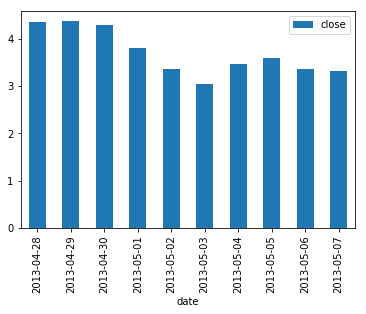

In [43]:
# plot the bar chart
litcoin_crypto.plot(kind='bar', x='date', y='close')
plt.show()

## BigQuery ML

In [0]:
%%bigquery --project ekabasandbox btc_market
WITH
  params AS (
  SELECT
    1 AS TRAIN,
    2 AS EVAL ),
    
  btc_market AS (
  SELECT
    symbol,
    date,
    open,
    high,
    low,
    close,
    spread,
    cast(LEAD(close, 1) OVER (PARTITION BY symbol ORDER BY symbol DESC) AS NUMERIC) AS next_day_close
  FROM
    `ebisong_crypto.markets_terminal`,
    params
  WHERE
    symbol = 'BTC'
    AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),4) = params.TRAIN )
    
SELECT
  *
FROM
  btc_market
WHERE
  next_day_close IS NOT NULL

In [46]:
# display the first 10 rows of the query
btc_market.head(10)

,symbol,date,open,high,low,close,spread,next_day_close
0,BTC,2013-05-05,112.9,118.8,107.14,115.91,11.66,115.24
1,BTC,2013-05-11,117.7,118.68,113.01,115.24,5.67,111.5
2,BTC,2013-05-14,117.98,119.8,110.25,111.5,9.55,114.22
3,BTC,2013-05-15,111.4,115.81,103.5,114.22,12.31,121.99
4,BTC,2013-05-19,123.21,124.5,119.57,121.99,4.93,123.89
5,BTC,2013-05-22,122.89,124,122,123.89,2,133.2
6,BTC,2013-05-24,126.3,133.85,125.72,133.2,8.13,128.8
7,BTC,2013-05-30,132.25,132.25,127,128.8,5.25,106.35
8,BTC,2013-06-10,100.44,110.1,95,106.35,15.1,110.15
9,BTC,2013-06-20,108.25,114.3,107.5,110.15,6.8,109.5


The trained model is stored in a BigQuery dataset. In this case, we’ll create a BigQuery dataset to store the model.

In [0]:
from google.cloud import bigquery

In [0]:
client = bigquery.Client(project='ekabasandbox')

In [0]:
# create a BigQuery dataset to store your ML model
dataset = client.create_dataset('btc_crypto')

In [50]:
print('Dataset: `{}` created.'.format(dataset.dataset_id))

Dataset: `btc_crypto` created.


In [0]:
# train the model
%%bigquery --project ekabasandbox model
CREATE OR REPLACE MODEL `btc_crypto.market_closing_model`
OPTIONS
  (model_type='linear_reg',
    labels=['next_day_close']) AS
WITH
  params AS (
  SELECT
    1 AS TRAIN,
    2 AS EVAL ),
  btc_market AS (
  SELECT
    CAST(open AS NUMERIC) AS open,
    CAST(high AS NUMERIC) AS high,
    CAST(low AS NUMERIC) AS low,
    CAST(close AS NUMERIC) AS close,
    CAST(spread AS NUMERIC) AS spread,
    CAST(LEAD(close, 1) OVER (PARTITION BY symbol ORDER BY symbol DESC) AS NUMERIC) AS next_day_close
  FROM
    `ebisong_crypto.markets_terminal`,
    params
  WHERE
    symbol = 'BTC'
    AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),4) = params.TRAIN )
SELECT
  *
FROM
  btc_market
WHERE
  next_day_close IS NOT NULL

In [53]:
# check that the created model exists
!bq ls btc_crypto

        tableId          Type    Labels   Time Partitioning   Clustered Fields  
 ---------------------- ------- -------- ------------------- ------------------ 
  market_closing_model   MODEL                                                  


In [0]:
# evaluate the model
%%bigquery --project ekabasandbox rmse
SELECT
  SQRT(mean_squared_error) AS rmse
FROM
  ML.EVALUATE(MODEL `btc_crypto.market_closing_model`,
    (
    WITH
      params AS (
      SELECT
        1 AS TRAIN,
        2 AS EVAL ),
      btc_market AS (
      SELECT
        CAST(open AS NUMERIC) AS open,
        CAST(high AS NUMERIC) AS high,
        CAST(low AS NUMERIC) AS low,
        CAST(close AS NUMERIC) AS close,
        CAST(spread AS NUMERIC) AS spread,
        CAST(LEAD(close, 1) OVER (PARTITION BY symbol ORDER BY symbol DESC) AS NUMERIC) AS next_day_close
      FROM
        `ebisong_crypto.markets_terminal`,
        params
      WHERE
        symbol = 'BTC'
        AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),4) = params.EVAL )
    SELECT
      *
    FROM
      btc_market
    WHERE
      next_day_close IS NOT NULL ))

In [56]:
rmse

,rmse
0,419.169302


In [0]:
# predict with the model
%%bigquery --project ekabasandbox predict
SELECT
  *
FROM
  ml.PREDICT(MODEL `btc_crypto.market_closing_model`,
    (
    WITH
      params AS (
      SELECT
        1 AS TRAIN,
        2 AS EVAL ),
      btc_market AS (
      SELECT
        CAST(close AS NUMERIC) AS close,
        date,
        CAST(open AS NUMERIC) AS open,
        CAST(high AS NUMERIC) AS high,
        CAST(low AS NUMERIC) AS low,        
        CAST(spread AS NUMERIC) AS spread,
        CAST(LEAD(close, 1) OVER (PARTITION BY symbol ORDER BY symbol DESC) AS NUMERIC) AS next_day_close
      FROM
        `ebisong_crypto.markets_terminal`,
        params
      WHERE
        symbol = 'BTC'
        AND MOD(ABS(FARM_FINGERPRINT(CAST(date AS STRING))),4) = params.EVAL )
    SELECT
      *
    FROM
      btc_market
    WHERE
      next_day_close IS NOT NULL ))

In [59]:
predict

,predicted_next_day_close,close,date,open,high,low,spread,next_day_close
0,170.690742,116.99,2013-05-01,139,139.89,107.72,32.17,112.5
1,152.628050,112.5,2013-05-04,98.1,115,92.5,22.5,111.5
2,135.175293,111.5,2013-05-07,112.25,113.44,97.7,15.74,117.2
3,161.370665,117.2,2013-05-10,112.8,122,111.55,10.45,115
4,149.780035,115,2013-05-12,115.64,117.45,113.44,4.01,117.98
5,151.535356,117.98,2013-05-13,114.82,118.7,114.5,4.2,123.02
6,160.145236,123.02,2013-05-17,118.21,125.3,116.57,8.73,123.5
7,157.069385,123.5,2013-05-18,123.5,125.25,122.3,2.95,126.7
8,158.004928,126.7,2013-05-23,123.8,126.93,123.1,3.83,129.75
9,165.272868,129.75,2013-05-27,133.5,135.47,124.7,10.77,129
